# Compare different projections

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_fig = '/Users/dewilebars/Projects/KNMIClimateScenarios2021-2023/KNMI21/projections/figures/'

In [19]:
data_dir = ['../outputs/' , '../outputs/'] #'../outputs/ref_proj/'
#namelists = ['loc', 'loc_TempAll', 'loc_TempAll_odyn_CMIP5']
#namelists = ['AR5_glo_decomp', 'RECEIPT_D73']
namelists = ['RECEIPT_D73', 'RECEIPT_D73']
sce = ['ssp245', 'ssp585'] 

proj_ds_list = []
for i in range(len(namelists)):
    proj_ds_list.append(xr.open_dataset(f'{data_dir[i]}SeaLevelPerc_{namelists[i]}_{sce[i]}.nc'))

### Compare the percentiles in 2100

In [20]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([ 33.455274,  41.503684,  46.046956,  50.389892,  51.944373,  65.291301,
        83.532462,  86.589266,  96.573166, 109.774173, 143.819586])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [21]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        if proj in tot_df.columns:
            tot_df[f'{proj}_{idx}'] = df['perc_ts']
        else:
            tot_df[proj] = df['perc_ts']
tot_df

,RECEIPT_D73,RECEIPT_D73_1
percentiles,,
1,33.455274,39.745423
5,41.503684,51.419662
10,46.046956,57.789297
17,50.389892,63.834841
20,51.944373,65.970256
50,65.291301,83.970956
80,83.532462,107.683329
83,86.589266,111.574633
90,96.573166,124.084949


### Compare the time series of individual contributors

In [24]:
nb_proc = len(proj_ds_list[0].proc)
perc = 95

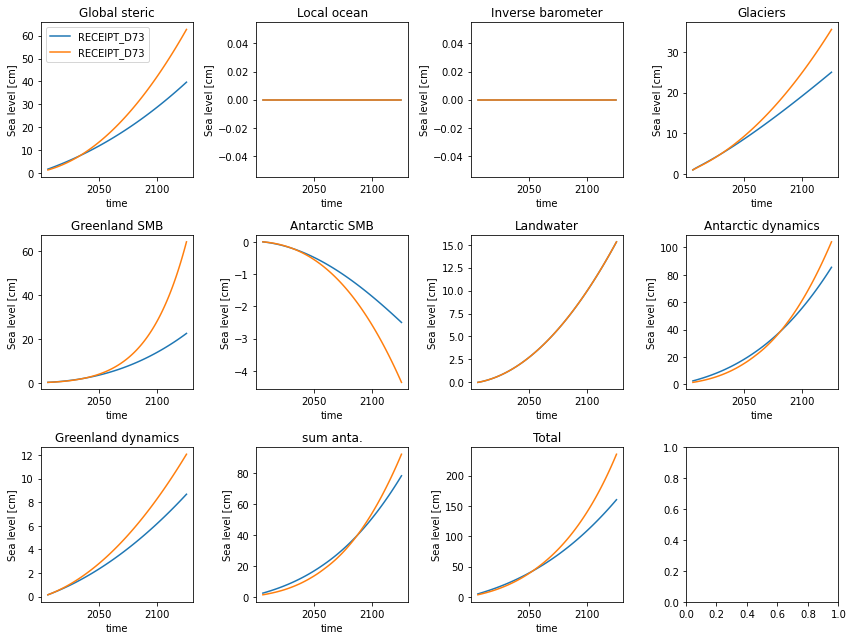

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()

#plt.savefig(f'{path_fig}comp_proj_{sce[0]}_{sce[1]}.pdf', dpi=150)